<a href="https://colab.research.google.com/github/PX2145-2025/week-7-b-cormack-bethan/blob/main/random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

# Introduction
Random processes are very common in physics. When dealing with large numbers of molecules, such as in gases, we don’t describe the trajectory of every single particle ($10^{23}$ particles is too much to handle) but often use probabilities to determine the average behaviour. Here, we look at some illustrative examples of using random numbers in physical applications.

## Random walks
The random walk problem is a classic example which, despite its simplicity, describes very well the basic physical phenomenon of _diffusion_. Diffusion is a process where par- ticles which are initially concentrated in a region in space spread out with time. For example, a drop of ink in water will gradually spread to the whole volume of water, even if the water is perfectly still. This is because the individual molecules (both the ink and the water) (i) have random directions and speeds, which depend on the temperature, and (ii) also collide with each other. It turns out that these two ingredients can be modelled very easily.

## The method
We first look at a random walk in 1-D for a single particle. We start the particle off at the origin of the x-axis and assume that it moves unit distance in each time step (the molecular speed is thus 1 unit). At the end of each time step we set the direction to left or right with equal probability, mimicking the effect of collisions. You can easily write the python code, but for flexibility of later python coding, I show here how to define a function, called `walk(steps)`, which is passed a single number steps and returns a vector of that length, which contains all the positions of the random walk.

In [2]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    '''
    x = np.zeros(steps, int)  # initialise the array of integers
    x[0] = 0  # start at the origin
    for i in range(1, len(x)):
        rnd = random()  # rnd selected from [0,1)
        # step left or right randomly ...
        if (rnd<0.5):
            x[i] = x[i-1] + 1  # steps right one unit
        else:
            x[i] = x[i-1] - 1 # steps left one unit
    return x

IMPORTANT: Make sure you understand how this function is used, and how it works. The rest of this worksheet is based on using it. You can also use the vectorised version below.

In [3]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x

# Exercises

This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video example on 2D array slicing.

## Exercise 1
Use the above function to write code for a single random walker in 1-D.

 1. [2] Plot to the screen a random walk for 1000 steps, i.e. plot out the steps (position $x$ plotted
against step number $i$).
 2. [2] Plot out as above, but this time for 100 such walks (all displayed on the same
graph). You should do this simply by writing a loop.



In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Reusable functions

def random_walk_1d(n_steps: int,
                   p: float = 0.5,
                   step_size: float = 1.0,
                   rng: np.random.Generator | None = None):
    """
    Generate one 1-D random-walk trajectory.

    Parameters

    n_steps : int
        Number of steps to take.
    p : float
        Probability of taking a +step_size step (otherwise - step_size).
    step_size : float
        Magnitude of each step.
    rng : np.random.Generator or None
        Optional NumPy Generator for reproducibility. If None, a new one is used.

    Returns

    x : np.ndarray, shape (n_steps + 1,)
        Positions from step 0 (start at 0) to step n_steps.

    Notes

    * Returns data only (no plotting), following good practice from the functions notes.
    * Uses vectorised sampling for clarity and speed.
    """
    if rng is None:
        rng = np.random.default_rng()
    steps = rng.choice([step_size, -step_size], size=n_steps, p=[p, 1.0 - p])
    x = np.concatenate([[0.0], np.cumsum(steps)])
    return x


def simulate_many_walks(n_walks: int,
                        n_steps: int,
                        p: float = 0.5,
                        step_size: float = 1.0,
                        seed: int | None = 1234):
    """
    Simulate many independent random walks and return the final positions.

    Parameters

    n_walks : int
        Number of independent walks.
    n_steps : int
        Number of steps in each walk.
    p, step_size, seed : see above.

    Returns

    finals : np.ndarray, shape (n_walks,)
        Final position after n_steps for each walk.
    """
    rng = np.random.default_rng(seed)
    finals = np.empty(n_walks, dtype=float)
    for i in range(n_walks):
        finals[i] = random_walk_1d(n_steps, p=p, step_size=step_size, rng=rng)[-1]
    return finals


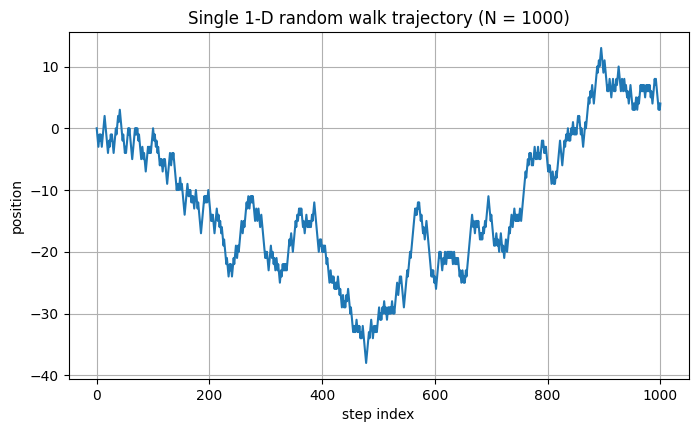

In [6]:
# Single traj (unbiased walk)

N = 1000         # number of steps
p = 0.5          # unbiased
seed_demo = 7

x = random_walk_1d(N, p=p, rng=np.random.default_rng(seed_demo))

plt.figure(figsize=(8, 4.5))
plt.plot(np.arange(N + 1), x)
plt.xlabel("step index")
plt.ylabel("position")
plt.title(f"Single 1-D random walk trajectory (N = {N})")
plt.grid(True)
plt.show()

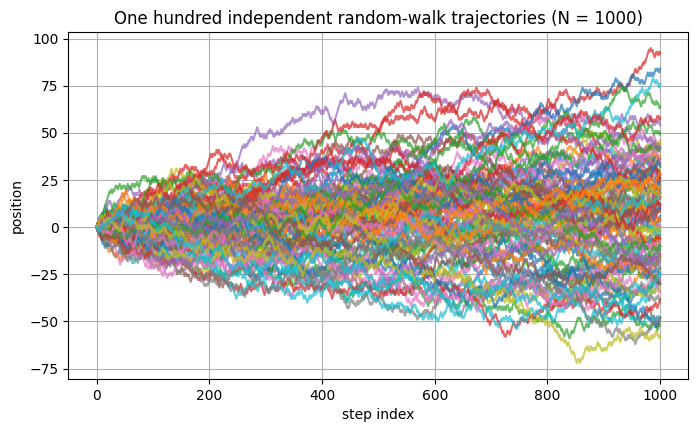

In [7]:
# Multiple trajto show qualitative behaviour

n_paths = 100
N = 1000
rng = np.random.default_rng(2025)

plt.figure(figsize=(8, 4.5))
for _ in range(n_paths):
    xk = random_walk_1d(N, p=p, rng=rng)
    plt.plot(np.arange(N + 1), xk, alpha=0.7)
plt.xlabel("step index")
plt.ylabel("position")
plt.title(f"One hundred independent random-walk trajectories (N = {N})")
plt.grid(True)
plt.show()

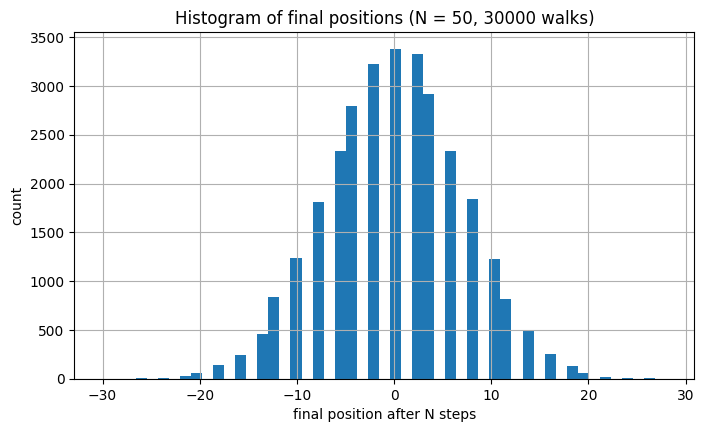

In [ ]:
# Distribution of final positions vs theory (unbiased)

# For step_size = 1 and p = 0.5:
# Theoretical mean of final position after N steps: 0
# Theoretical variance of final position after N steps: N

def study_final_distribution(N_values=(50, 100, 200, 500),
                             n_walks=30000,
                             p=0.5,
                             step_size=1.0,
                             seed=42):
    """
    For a list of N, simulate many walks and return measured mean and variance.
    Also shows a histogram for the first N in the list.
    """
    results = []
    for i, N in enumerate(N_values):
        finals = simulate_many_walks(n_walks=n_walks, n_steps=N,
                                     p=p, step_size=step_size, seed=seed)
        mean_est = finals.mean()
        var_est = finals.var(ddof=1)
        results.append((N, mean_est, var_est))

        if i == 0:
            plt.figure(figsize=(8, 4.5))
            plt.hist(finals, bins=51)
            plt.xlabel("final position after N steps")
            plt.ylabel("count")
            plt.title(f"Histogram of final positions (N = {N}, {n_walks} walks)")
            plt.grid(True)
            plt.show()
    return np.array(results, dtype=float)

results = study_final_distribution(N_values=(50, 100, 200, 500),
                                   n_walks=30000, p=0.5, step_size=1.0)

# Display a small table and a variance-vs-N plot
import pandas as pd
df = pd.DataFrame(results, columns=["N", "mean_estimate", "variance_estimate"])
df["theory_mean"] = 0.0
df["theory_variance"] = df["N"]  # for step_size=1, p=0.5

print(df)

plt.figure(figsize=(7.5, 4.5))
plt.plot(df["N"], df["variance_estimate"], marker="o", linestyle="")
plt.plot(df["N"], df["theory_variance"])
plt.xlabel("N (number of steps)")
plt.ylabel("variance of final position")
plt.title("Variance grows linearly with N (unbiased walk)")
plt.grid(True)
plt.show()


## Exercise 2
You will now extend your code to allow for _multiple_ walks in a more systematic way. Do this by defining a 2-D array to contain the trajectories of `N` particles, each taking a number of steps called `steps`, i.e. define an initially empty integer array like this:
```python
particles = np.zeros((steps, N), int)
```
Which you will fill with the `steps` of each `N` particles. You may find [week 6 of PX1224](https://alexandria.astro.cf.ac.uk/Joomla-python/index.php/week-6-two-dimensional-arrays) useful, in particular "2.2. Returning parts of 2-d Arrays".

 1. [2] Calculate and then plot out the steps for 10 walkers to the screen (still use 1000 steps), all on the same plot.
 2. [2] Calculate (plot if you wish) the steps for 500 walkers. We define _for each step_ a "mean position": the average of the positions of all walkers at each step. We also define _for each step_ a "mean squared position": the average of the squares of the positions of all walkers (**not** the square of the average) at each step. Those two quantities, the "mean position" and the "mean squared position" are standard quantities in random walks. Print out the "mean position" and the "mean squared position" of the 500 walkers at the _last_ step.
 3. [4] Calculate the mean position at _each_ step, and plot it.
 4. [4] Calculate the mean squared position of the 500 walkers at _each_ step, and
plot it. What do you notice?



In [ ]:
# reusable
import numpy as np
import matplotlib.pyplot as plt

def simulate_walkers(n_steps: int,
                     n_walkers: int,
                     p: float = 0.5,
                     step_size: float = 1.0,
                     seed: int | None = None):
    """
    Vectorised simulation of many 1-D random walkers.

    Returns

    positions : array, shape (n_steps + 1, n_walkers)
        Position of each walker at every step (start at 0).
    """
    rng = np.random.default_rng(seed)
    # steps[t, j] is the step taken by walker j at time t (t=1..n_steps)
    steps = rng.choice([step_size, -step_size],
                       size=(n_steps, n_walkers),
                       p=[p, 1.0 - p])
    # prepend zeros (t=0) then cumulative sum over time
    positions = np.vstack([np.zeros((1, n_walkers)),
                           np.cumsum(steps, axis=0)])
    return positions


In [ ]:
# 10 walkers, 1000 steps, all on same plot
N_STEPS = 1000
N_WALKERS = 10
pos10 = simulate_walkers(N_STEPS, N_WALKERS, p=0.5, seed=1)

plt.figure(figsize=(9, 5))
for j in range(N_WALKERS):
    plt.plot(pos10[:, j], alpha=0.9)
plt.xlabel("step index")
plt.ylabel("position")
plt.title(f"Exercise 2.1 - 10 random walkers (N={N_STEPS} steps)")
plt.grid(True)
plt.show()


In [ ]:
# 500 walkers stats at the last step
N_WALKERS = 500
pos500 = simulate_walkers(N_STEPS, N_WALKERS, p=0.5, seed=2)

final_positions = pos500[-1, :]              # shape (500,)
mean_final = final_positions.mean()          # ⟨X_N⟩
ms_final = (final_positions**2).mean()       # ⟨X_N^2⟩ (mean squared position)

print(f"Exercise 2.2 - with {N_WALKERS} walkers and N={N_STEPS} steps")
print(f"Mean final position ⟨X_N⟩ ≈ {mean_final:.4f}")
print(f"Mean squared final position ⟨X_N^2⟩ ≈ {ms_final:.4f}")

# trajectories for 500 walkers
plt.figure(figsize=(9,5))
plt.plot(pos500[:, :50])  # show 50 for clarity
plt.xlabel("step index"); plt.ylabel("position")
plt.title("Subset of 500 walkers")
plt.grid(True); plt.show()


In [ ]:
# Mean position at each step and plot
mean_each_step = pos500.mean(axis=1)   # average over walkers, for t=0..N

plt.figure(figsize=(9, 5))
plt.plot(mean_each_step)
plt.xlabel("step index")
plt.ylabel("mean position")
plt.title("Exercise 2.3 - Mean position ⟨X_t⟩ vs step")
plt.grid(True)
plt.show()


In [ ]:
# Mean squared position at each step and plot
ms_each_step = (pos500**2).mean(axis=1)  # ⟨X_t^2⟩ over walkers

plt.figure(figsize=(9, 5))
plt.plot(ms_each_step)
plt.xlabel("step index")
plt.ylabel("mean squared position")
plt.title("Exercise 2.4 - Mean squared position ⟨X_t^2⟩ vs step")
plt.grid(True)
plt.show()



## Exercise 3
Extend the previous exercise by plotting a histogram of particle positions. You will need to decide yourself how best to do this. You will need to use the histogram function `plt.hist`.

 1. [2] Plot a histogram at the _last_ step.
 2. [2] Plot a histogram for intermediate steps of your choice to illustrate how it changes with the number of steps. Each histogram should be saved as an image to that they can easily be viewed afterwards. (If you feel ambitious, you could make an animation, see the solution to the optional question of week 3 for an example how).


In [ ]:
# 2-D simulator (no duplicate imports)
# Depends on: numpy as np already imported
def simulate_walkers_2d(n_steps: int,
                        n_walkers: int,
                        step_size: float = 1.0,
                        seed: int | None = None):
    """
    2-D simple random walk on a square lattice.
    Steps are chosen uniformly from {(+-step_size, 0), (0, +-step_size)}.
    Returns pos of shape (n_steps+1, n_walkers, 2), starting at (0,0).
    """
    rng = np.random.default_rng(seed)
    dirs = np.array([[ step_size,  0.0],
                     [-step_size,  0.0],
                     [ 0.0,  step_size],
                     [ 0.0, -step_size]], dtype=float)
    idx = rng.integers(0, 4, size=(n_steps, n_walkers))
    steps = dirs[idx]  # (n_steps, n_walkers, 2)
    pos = np.vstack([np.zeros((1, n_walkers, 2)),
                     np.cumsum(steps, axis=0)])  # (n_steps+1, n_walkers, 2)
    return pos


In [ ]:
# parameters
N_STEPS   = 1000
STEP_SIZE = 1.0
SEED      = 3


In [ ]:
# Ten sample 2-D trajectories (single figure)
# Depm on matplotlib.pyplot as plt imported
N_WALKS_DEMO = 10
pos10 = simulate_walkers_2d(N_STEPS, N_WALKS_DEMO, step_size=STEP_SIZE, seed=SEED)

plt.figure(figsize=(7.5, 7.5))
for j in range(N_WALKS_DEMO):
    plt.plot(pos10[:, j, 0], pos10[:, j, 1], alpha=0.9)
plt.xlabel("x position")
plt.ylabel("y position")
plt.title(f"Exercise 3.1 - Ten 2-D random-walk trajectories (N = {N_STEPS})")
plt.axis("equal")
plt.grid(True)
plt.show()


In [ ]:
# Mean-squared displacement (MSD) vs t with theory
# Theory for 2-D lattice, step=1: Var(x_t)=Var(y_t)=t/2 ⇒ MSD = ⟨x^2 + y^2⟩ = t

N_WALKS_MSD = 1000
pos_msd = simulate_walkers_2d(N_STEPS, N_WALKS_MSD, step_size=STEP_SIZE, seed=SEED+1)

x = pos_msd[:, :, 0]
y = pos_msd[:, :, 1]
t = np.arange(N_STEPS + 1, dtype=float)

msd_measured = (x**2 + y**2).mean(axis=1)   # average over walkers
msd_theory   = t * (STEP_SIZE**2)           # STEP_SIZE scaling

plt.figure(figsize=(9, 5))
plt.plot(t, msd_measured, label="measured MSD")
plt.plot(t, msd_theory,   label="theory: MSD = t · step_size^2")
plt.xlabel("step index t")
plt.ylabel("mean-squared displacement ⟨x^2 + y^2⟩")
plt.title("Exercise 3.2 - MSD grows linearly with t (2-D)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final-step MSD - measured: {msd_measured[-1]:.3f}, theory: {msd_theory[-1]:.3f}")


In [ ]:
# Radial distribution at final time (Rayleigh check)
# In the large-N limit, x and y ~ N(0, sigmA^2) with sigma^2 = Var(x_t) = t·step_size^2/2.
# Then r = sqrt(x^2+y^2) ~ Rayleigh(sigma) where sigma = sqrt(t·step_size^22).

def rayleigh_pdf(r, sigma):
    return (r / sigma**2) * np.exp(-(r**2) / (2.0 * sigma**2))

final_x = pos_msd[-1, :, 0]
final_y = pos_msd[-1, :, 1]
r_final = np.sqrt(final_x**2 + final_y**2)

sigma = np.sqrt(N_STEPS * (STEP_SIZE**2) / 2.0)
counts, edges, _ = plt.hist(r_final, bins=60, density=True, label="measured", alpha=0.9)
centres = 0.5 * (edges[:-1] + edges[1:])
plt.plot(centres, rayleigh_pdf(centres, sigma), label=f"Rayleigh(sigma={sigma:.2f})")
plt.xlabel("radius r at t = N")
plt.ylabel("probability density")
plt.title(f"Exercise 3.3 - Radial distribution at N = {N_STEPS}")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Effective diffusion coefficient estimate
# In 2D, MSD ≈ 4 D t  =>  D_hat(t) = MSD(t) / (4 t). For our lattice walk with step=1, theory D=1/4 per step.

valid = t[1:]  # skip t=0
D_hat = msd_measured[1:] / (4.0 * valid)

print(f"Estimated D at final step: {D_hat[-1]:.4f}  (theory ≈ {(STEP_SIZE**2)/4:.4f})")

plt.figure(figsize=(9, 5))
plt.plot(valid, D_hat)
plt.xlabel("step index t")
plt.ylabel("D_hat(t) = MSD / (4 t)")
plt.title("Exercise 3.4 - Effective diffusion coefficient")
plt.grid(True)
plt.show()


In [ ]:
# First-passage time to a circle of radius R (distribution + mean)
def first_passage_times(pos, R: float):
    """
    pos : (n_steps+1, n_walkers, 2)
    R   : radius threshold
    Returns an array of length n_walkers with the first t where r_t >= R, or np.nan if never hit.
    """
    r = np.sqrt(pos[:, :, 0]**2 + pos[:, :, 1]**2)  # (T, W)
    hits = (r >= R)
    T, W = hits.shape
    fpt = np.full(W, np.nan)
    for j in range(W):
        idx = np.argmax(hits[:, j])  # 0 if never hit; check if hit is true there
        if hits[idx, j]:
            fpt[j] = idx
    return fpt

R = 40.0
pos_many = simulate_walkers_2d(5000, 2000, step_size=STEP_SIZE, seed=SEED+2)
fpt = first_passage_times(pos_many, R)

mean_fpt = np.nanmean(fpt)
print(f"Exercise 3.5 - First-passage to radius R={R}")
print(f"Mean first-passage time (over walkers who hit): {mean_fpt:.1f} steps")

plt.figure(figsize=(9, 5))
plt.hist(fpt[~np.isnan(fpt)], bins=60)
plt.xlabel("first-passage time (steps)")
plt.ylabel("count")
plt.title(f"First-passage time distribution to r >= {R}")
plt.grid(True)
plt.show()


# Task
Create an animation of the random walk using the `pos500` data from Exercise 2, saving it as a GIF.

## Import necessary libraries

### Subtask:
Ensure `matplotlib.animation` is imported.


**Reasoning**:
The subtask is to import the `animation` module from `matplotlib`.



In [ ]:
import matplotlib.animation as animation

## Prepare data

### Subtask:
Use the `pos500` data from Exercise 2 (positions of 500 walkers over 1000 steps) for the animation.


**Reasoning**:
Verify the existence and shape of the `pos500` variable to ensure it contains the correct data for the animation.



In [ ]:
print(f"Variable pos500 exists: {'pos500' in locals()}")
if 'pos500' in locals():
    print(f"Shape of pos500: {pos500.shape}")

## Set up the figure and axes

### Subtask:
Set up the figure and axes for the animation.


**Reasoning**:
Set up the figure and axes for the animation, including setting limits and labels as per the instructions.



In [ ]:
fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set x-axis limits
ax.set_xlim(0, N_STEPS)

# Determine and set y-axis limits based on pos500 data
min_pos = np.min(pos500)
max_pos = np.max(pos500)
# Add a small buffer to the limits
buffer = (max_pos - min_pos) * 0.1
ax.set_ylim(min_pos - buffer, max_pos + buffer)

# Set labels and title
ax.set_xlabel('Step Number')
ax.set_ylabel('Position')
ax.set_title('Random Walk Animation (Step: 0)')

# Initialize lines for the animation
lines = [ax.plot([], [], lw=1)[0] for _ in range(N_WALKERS)]

**Reasoning**:
The figure and axes have been set up. The next step is to define the initialization function for the animation.



In [ ]:
def init():
    """Initializes the lines for the animation."""
    for line in lines:
        line.set_data([], [])
    return lines

**Reasoning**:
The next step is to define the animation function which updates the data for each frame.



In [ ]:
def animate(i):
    """Updates the data for each frame of the animation."""
    for j, line in enumerate(lines):
        line.set_data(np.arange(i + 1), pos500[:i+1, j])
    ax.set_title(f'Random Walk Animation (Step: {i})')
    return lines

**Reasoning**:
Create the animation object using the figure, initialization function, and animation function, then save the animation as a GIF.



In [ ]:
# Create the animation
# Interval is in milliseconds
ani = animation.FuncAnimation(fig, animate, frames=N_STEPS + 1, init_func=init, blit=True, interval=20)

# Define the path to save the GIF
GIF_PATH = '/content/random_walk_animation.gif'

# Save the animation as a GIF
try:
    ani.save(GIF_PATH, writer="pillow", dpi=90)
    print(f"Saved GIF -> {GIF_PATH}")
except Exception as e:
    print("GIF save failed:", e)